In [110]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [111]:
#Loading Dataset
data = pd.read_csv("MSFT_daily_EWMA.csv")
data["timestamp"] = pd.to_datetime(data["timestamp"]).dt.date
data = data.set_index("timestamp")
data

,close,8EWMA,20EWMA,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
timestamp,,,,,,,,,,,
2017-06-02,71.76,71.760000,71.760000,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2017-06-05,72.28,72.052500,72.033000,1.0,20.0,20.0,1445.6,8554.4,10000.0,NaN,NaN
2017-06-06,72.52,72.248705,72.211823,1.0,20.0,0.0,1450.4,8554.4,10004.8,0.00048,0.00048
2017-06-07,72.39,72.298226,72.263260,1.0,20.0,0.0,1447.8,8554.4,10002.2,-0.00026,0.00022
2017-06-08,71.95,72.190054,72.187485,1.0,20.0,0.0,1439.0,8554.4,9993.4,-0.00088,-0.00066
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,262.52,260.173906,266.336119,0.0,0.0,0.0,0.0,11246.8,11246.8,0.00000,0.12468
2022-05-26,265.90,261.446371,266.294584,0.0,0.0,0.0,0.0,11246.8,11246.8,0.00000,0.12468
2022-05-27,273.24,264.067178,266.956052,0.0,0.0,0.0,0.0,11246.8,11246.8,0.00000,0.12468


In [112]:
#Generating Matrix of Features
X = data[["8EWMA", "20EWMA"]]
X = X.drop(X.index[1258])
X

,8EWMA,20EWMA
timestamp,,
2017-06-02,71.760000,71.760000
2017-06-05,72.052500,72.033000
2017-06-06,72.248705,72.211823
2017-06-07,72.298226,72.263260
2017-06-08,72.190054,72.187485
...,...,...
2022-05-24,259.503593,266.737816
2022-05-25,260.173906,266.336119
2022-05-26,261.446371,266.294584


In [126]:
#Generating Dependent Variable Vectors
y = data[["Signal"]].shift(1)
y = y.dropna()
y

,Signal
timestamp,
2017-06-05,0.0
2017-06-06,1.0
2017-06-07,1.0
2017-06-08,1.0
2017-06-09,1.0
...,...
2022-05-25,0.0
2022-05-26,0.0
2022-05-27,0.0


In [114]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [115]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [116]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [117]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=100,activation="sigmoid"))

In [118]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=50,activation="sigmoid"))

In [119]:
 #Adding Third Hidden Layer
ann.add(tf.keras.layers.Dense(units=40,activation="tanh"))

In [120]:
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [121]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [122]:
#Fitting ANN
ann.fit(X_train_scaled,y_train,batch_size=32,epochs = 500)

Epoch 1/500
32/32 [==============================] - 2s 3ms/step - loss: 0.6005 - accuracy: 0.7058
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.7217
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5873 - accuracy: 0.7217
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5825 - accuracy: 0.7217
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.7217
Epoch 6/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5823 - accuracy: 0.7217
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5793 - accuracy: 0.7217
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7197
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5806 - accuracy: 0.7217
Epoch 10/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.7217
Epoch 11/

In [123]:
ann_loss, ann_accuracy = ann.evaluate(X_test_scaled, y_test, verbose=2)


8/8 - 0s - loss: 0.1167 - accuracy: 0.9286 - 391ms/epoch - 49ms/step


In [141]:
# Making predictions using the testing data
predictions = ann.predict(X_test_scaled)
predictions

array([[9.8181659e-01],
       [1.0000000e+00],
       [9.9917448e-01],
       [2.8959963e-01],
       [6.9896948e-01],
       [9.9300253e-01],
       [4.1104242e-01],
       [9.9998927e-01],
       [8.7836373e-01],
       [9.9990046e-01],
       [1.0000000e+00],
       [9.9999046e-01],
       [9.9999428e-01],
       [8.4466529e-01],
       [1.0000000e+00],
       [9.9814022e-01],
       [9.9999857e-01],
       [9.9864864e-01],
       [9.9999982e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.1302972e-07],
       [1.0000000e+00],
       [9.6395701e-01],
       [8.4609669e-01],
       [9.9995971e-01],
       [9.3087852e-02],
       [2.2230935e-01],
       [9.2889458e-01],
       [9.9662453e-01],
       [1.0000000e+00],
       [9.9991667e-01],
       [1.7659819e-05],
       [9.7237122e-01],
       [9.9349898e-01],
       [3.3100700e-05],
       [9.9963993e-01],
       [9.9999297e-01],
       [7.1228519e-06],
       [9.9999863e-01],
       [1.2955904e-02],
       [9.952725

<AxesSubplot:ylabel='Frequency'>

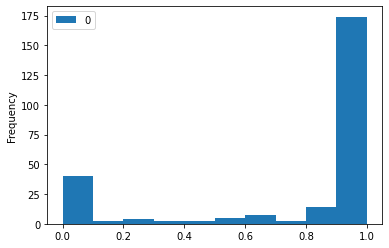

In [146]:
predictions_df = pd.DataFrame(predictions)

predictions_df.plot.hist()

In [147]:
predictions = (ann.predict(X_test_scaled)> 0.5).astype("int32")
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [148]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [149]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,50,18
Actual 1,0,184


Accuracy Score : 0.9285714285714286
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85        68
         1.0       0.91      1.00      0.95       184

    accuracy                           0.93       252
   macro avg       0.96      0.87      0.90       252
weighted avg       0.93      0.93      0.92       252



# Results
## with 500 epochs, 11.67% loss and 92.86% accuracy 
